# *Mall Customer Analysis*
***
This dataset was provided by @Lasheen, you can download it from: https://github.com/lasheencode/Serial-AI_Mall-Customer-Analysis
## Project
The idea of this project is to some EDA in order to get to know the data before start our model. The goal of this task is to do a customer segmentation so the marketing team can make proper strategies in order to catch the audience.

In [1]:
import pandas as pd

data = pd.read_csv('D:\Programacion\Proyectos\Data Science\Mall Customer Dataset\Mall_Customers.csv', delimiter=',')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## First comments
The dataset is really small. Only 200 instances, that could be a problem depending of what we want to apply. The features that we are going to work with are: gender, age, income, spending score. The last one seems to be a score that measures the amount of money that was spent. From a business perspective the spending score is going to be the most important feature.<br><br> In economics, it is well known that the more you earn, the more you spend. But in this dataset that  is not necessarily True, so it would be nice to check. <br><br>It is said as well that gender is really important to explain annual income, basically, male > female. It is not our main purpose to tackle this questions here, but would be nice to check it as well.

## Tasks
- The more you earn, the more you spend? <br>
- Is gender important explaining the annual income or the spending score of the customers? <br>
- Is Age important?


## *The more you earn, the more you spend?*
We are going to start by exploring the relation beetwen *Anual Income and Spending Score*. The idea is to check if in this dataset happend that the people that has higher income is the one who spend the most as well. The insight would be usefull for the marketing team of the company as well.

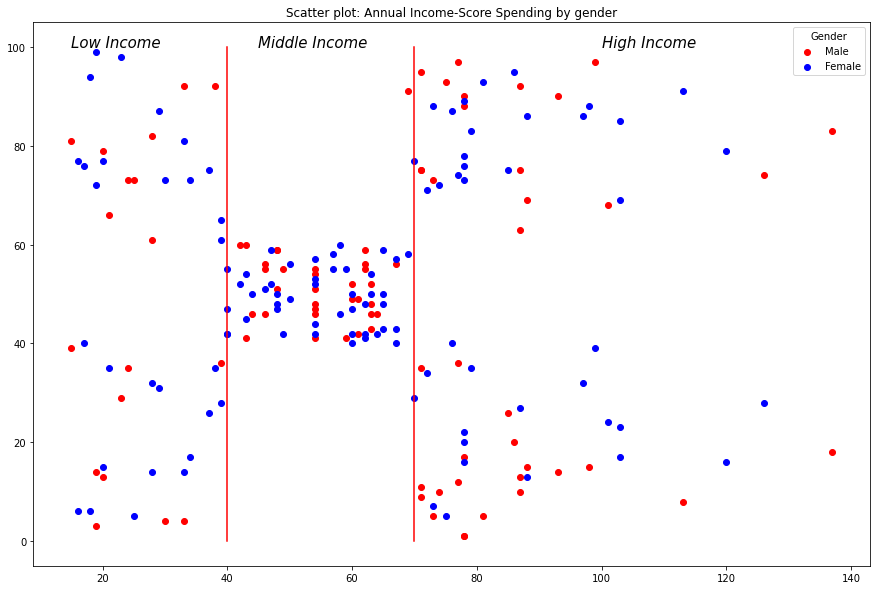

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

# Start the subplot
fig1, ax = plt.subplots(figsize=(15,10))

# Make the scatter plot, plot Male and Female cases.
ax.scatter(data.loc[data['Gender'] == 'Male']['Annual Income (k$)'], data.loc[data['Gender'] == 'Male']['Spending Score (1-100)'], c = 'red', label = 'Male')
ax.scatter(data.loc[data['Gender'] == 'Female']['Annual Income (k$)'], data.loc[data['Gender'] == 'Female']['Spending Score (1-100)'], c = 'blue', label = 'Female')
ax.legend(title='Gender', loc='upper right')

# Add lines to divide the plot base on income
line_lowincome, line_middleincome = Line2D([40,40], [0,100], color='red'), Line2D([70,70], [0,100], color='red')

# Set the title
plt.title('Scatter plot: Annual Income-Score Spending by gender')

# Add the lines
ax.add_line(line_lowincome)
ax.add_line(line_middleincome)

# Add tect to each part of the graph.
ax.text(100, 100, 'High Income', fontsize=15, fontstyle='italic')
ax.text(45,100, 'Middle Income', fontsize=15, fontstyle='italic')
ax.text(15,100, 'Low Income', fontsize=15, fontstyle='italic')

plt.show()

As we can see in the graphic there seems to be 3 segments that are really well define. First, we have the "low income" customers that has 2 two main groups, the ones who has a spend scoring less than 40, and the others who has a spend scoring that is more than 60. Then, the second group with "middle income" are very concentrated beetwen >40 and <60 spending score. And the last one, "high income" group has a similar behaviour as the low income group. <br><br>
The distribution of the points are pretty weird actually, I can't find a rational reason for the empty white spaces of the graphic. We are working with a database of 200 instances, maybe this picture if pure coincidence, but there is nothing that we can say about this. <br><br>
So, **the more you earn the more you spend?** It doesnt seem True in this case. We actually dont know what the 'spending score' is, but if it is the amount of money that the customer has spent in the mall in any interval of time, there is no apparent relation beetwen Annual Income and Spending habits.

## *Is gender important explaining the annual income or the spending score of the customers?* <br>
In order to determine if gender is an important feature to explain Annual Income and Spending Score we are going to work with the categories that were define earlier (low income, etc) and check for the average income and spending score overall and on each category. Sometimes the mean could not be the best indicator in a distribution, but in this EDA we are going to work with it.

In [3]:
import numpy as np

# Create a custom variable base on Annual Income to get more information base on the previous graphic
# Low Income <= 40k, Middle Income > 40 and <= 70, else High Income
data['Income Category'] = np.select([data['Annual Income (k$)'] <= 40, (data['Annual Income (k$)'] > 40) & (data['Annual Income (k$)'] <= 70), 
                                        data['Annual Income (k$)'] > 70], ['Low Income', 'Middle Income', 'High Income'])

data[['Annual Income (k$)', 'Spending Score (1-100)', 'Income Category', 'Gender']].groupby(['Income Category', 'Gender']).describe()

Annual Income (k$)                                     \
                                    count       mean        std   min    25%   
Income Category Gender                                                         
High Income     Female               37.0  88.378378  15.115024  72.0  78.00   
                Male                 37.0  86.540541  17.249146  71.0  75.00   
Low Income      Female               32.0  28.625000   8.834500  16.0  19.75   
                Male                 18.0  25.222222   7.191135  15.0  20.00   
Middle Income   Female               43.0  56.976744   8.212906  42.0  49.50   
                Male                 33.0  55.151515   7.850642  42.0  48.00   

                                           Spending Score (1-100)             \
                         50%    75%    max                  count       mean   
Income Category Gender                                                         
High Income     Female  81.0  99.00  126.0                   37.0  55.027027   
                Male    81.0  88.00  137.0                   37.0  45.351351   
Low Income      Female  29.0  37.25   40.0                   32.0  49.937500   
                Male    24.0  29.50   39.0                   18.0  48.666667   
Middle Income   Female  58.0  63.50   70.0                   43.0  49.697674   
                Male    54.0  62.00   69.0                   33.0  51.969697   

                                                                   
                              std   min    25%   50%    75%   max  
Income Category Gender                                             
High Income     Female  30.908904   5.0  24.00  71.0  85.00  95.0  
                Male    35.905134   1.0  12.00  35.0  75.00  97.0  
Low Income      Female  29.445343   5.0  27.50  44.5  75.25  99.0  
                Male    32.400073   3.0  17.75  50.0  77.50  92.0  
Middle Income   Female   7.869576  29.0  43.50  50.0  54.50  77.0  
                Male     9.159984  41.0  46.00  51.0  56.00  91.0

With the table we can check for a few things. First thing to notice is that 56% of the instances corresponds to the female gender. And second, but not least important is the std of the spending score groups, if we look at the middle income std we notice that are really low compared to the other groups, this is another way to see what we have already noticed in the previous graphic, in this group the spending score is concentrated. <br><br>

* ### High Income
So, in this category the female earn 2k more annually on average, and has on average 10 points more of spending Score.

* ### Middle Income
Again the female earn almost 2k more annually on average, but males has 2 points more on average of spending Score

* ### Low Income
Females earn almost 2.5k more annually on average, and also has 1.3 points more on average of spending Score.

So, base on this numbers we can't say that there is a Gender bias in the data set, the most important difference was in he spending score category for high income individuals with a difference of 10 points beetwen genders. <br><br>
There is also another important aspect, if we pay attention of the count of each group that we compute we are going to notice that in Middle and Low Income categories there are a majority of women, the difference of 6% that we describe earlier are on those groups. What is going to happend with this is that if we take the mean of Annual Income or Spending Score for the whole group we probably are going to conclude that men earn more than women on average for this dataset. Let's check it.

In [4]:
data[['Annual Income (k$)', 'Spending Score (1-100)', 'Gender']].groupby('Gender').describe()

Annual Income (k$)                                                  \
                    count       mean        std   min    25%   50%    75%   
Gender                                                                      
Female              112.0  59.250000  26.011952  16.0  39.75  60.0  77.25   
Male                 88.0  62.227273  26.638373  15.0  45.50  62.5  78.00   

              Spending Score (1-100)                                        \
          max                  count       mean       std  min   25%   50%   
Gender                                                                       
Female  126.0                  112.0  51.526786  24.11495  5.0  35.0  50.0   
Male    137.0                   88.0  48.511364  27.89677  1.0  24.5  50.0   

                    
         75%   max  
Gender              
Female  73.0  99.0  
Male    70.0  97.0

As we said, men earn 3k more annualy on average than women, but women on average has a higher spending score. If we just annalyze this picture, we could have just confirmed that effectively men earn more but spend less, which is not true for all categories.

So, **Is gender important explaining the annual income or the spending score of the customers?** No, it isnt. The differences are not significant. The only thing that is important to notice for the marketing team is that high income women on average spend way more than men, and that could be use in publicity.

## Is Age important?
In this case, we are going to analyze if age is important in order to explain Annual Income and Spending Score, and after this, we are going to proceed to build the cluster model.

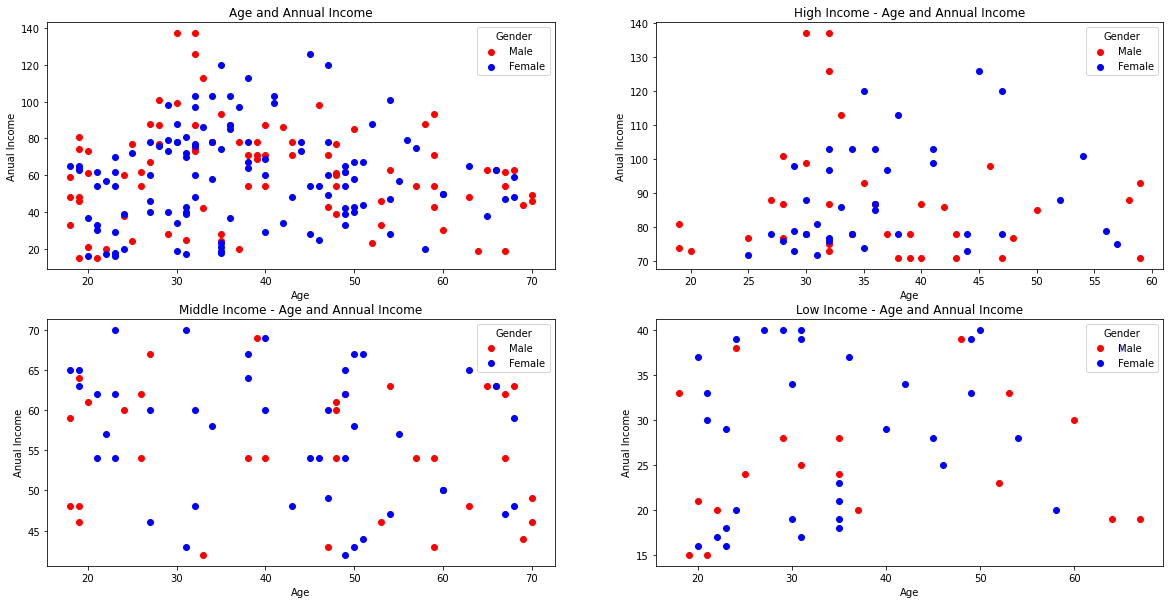

In [5]:
# Initialize the subplots
fig2, axs = plt.subplots(2, 2, figsize=(20,10))

# Initialize the list and the counter to use in the for loop
income = ['High Income', 'Middle Income', 'Low Income']
counter = 0

# For each row
for i in range(2):
    # For each column
    for j in range(2):
        # It is is the first graphic, plot the whole dataset       
        if i == 0 and j == 0:
            axs[i, j].scatter(data.loc[data['Gender'] == 'Male']['Age'], data.loc[data['Gender'] == 'Male']['Annual Income (k$)'], c = 'red', label = 'Male')
            axs[i, j].scatter(data.loc[data['Gender'] == 'Female']['Age'], data.loc[data['Gender'] == 'Female']['Annual Income (k$)'], c = 'blue', label = 'Female')
            axs[i, j].set_title('Age and Annual Income')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Anual Income')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
        # Plot the different categories
        else:
            axs[i, j].scatter(data.loc[data['Gender'] == 'Male'][data['Income Category'] == income[counter]]['Age'], data.loc[data['Gender'] == 'Male'][data['Income Category'] ==                                                income[counter]]['Annual Income (k$)'], c = 'red', label = 'Male')
            axs[i, j].scatter(data.loc[data['Gender'] == 'Female'][data['Income Category'] == income[counter]]['Age'], data.loc[data['Gender'] == 'Female'][data['Income Category']                                                       == income[counter]]['Annual Income (k$)'], c = 'blue', label = 'Female')
            axs[i, j].set_title(income[counter] + ' - Age and Annual Income')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Anual Income')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
            # Increment the counter to plot each category.
            counter += 1
plt.show()


At first glance there is no apparent relation beetwen the age and income. The only thing that is noticeable is that the higher incomes are beetwen 30s and middle 50s. What happens with Spending Score?

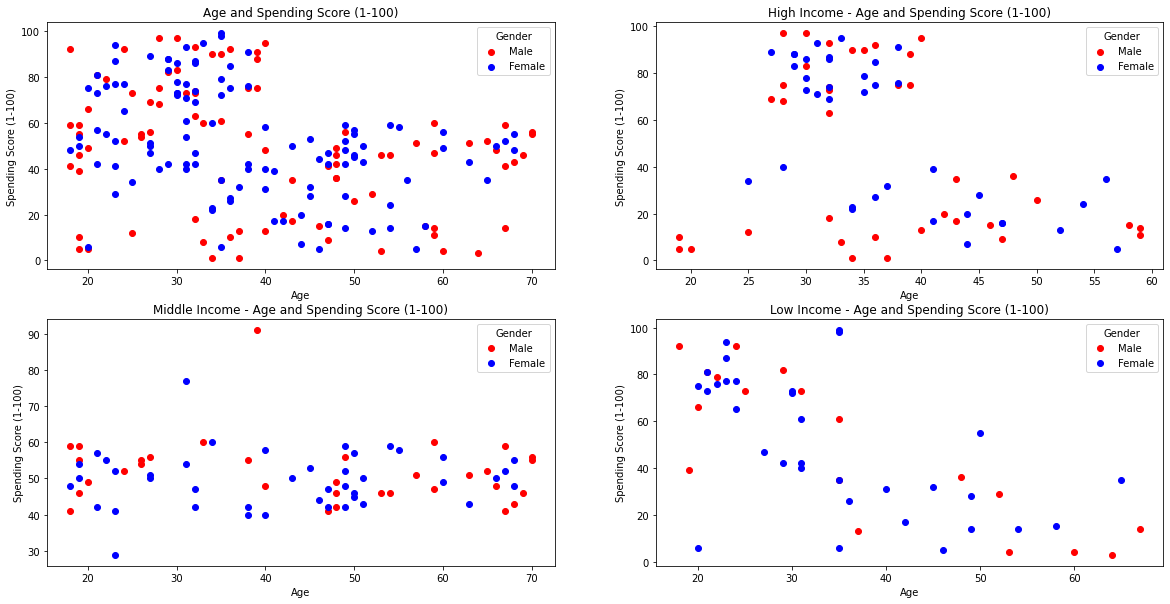

In [6]:
# Initialize the subplots
fig3, axs = plt.subplots(2, 2, figsize=(20,10))

# Initialize the list and the counter to use in the for loop
income = ['High Income', 'Middle Income', 'Low Income']
counter = 0

# For each row
for i in range(2):
    # For each column
    for j in range(2):
        # It is is the first graphic, plot the whole dataset       
        if i == 0 and j == 0:
            axs[i, j].scatter(data.loc[data['Gender'] == 'Male']['Age'], data.loc[data['Gender'] == 'Male']['Spending Score (1-100)'], c = 'red', label = 'Male')
            axs[i, j].scatter(data.loc[data['Gender'] == 'Female']['Age'], data.loc[data['Gender'] == 'Female']['Spending Score (1-100)'], c = 'blue', label = 'Female')
            axs[i, j].set_title('Age and Spending Score (1-100)')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Spending Score (1-100)')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
        # Plot the different categories
        else:
            axs[i, j].scatter(data.loc[data['Gender'] == 'Male'][data['Income Category'] == income[counter]]['Age'], data.loc[data['Gender'] == 'Male'][data['Income Category'] ==                                                income[counter]]['Spending Score (1-100)'], c = 'red', label = 'Male')
            axs[i, j].scatter(data.loc[data['Gender'] == 'Female'][data['Income Category'] == income[counter]]['Age'], data.loc[data['Gender'] == 'Female'][data['Income Category']                                                       == income[counter]]['Spending Score (1-100)'], c = 'blue', label = 'Female')
            axs[i, j].set_title(income[counter] + ' - Age and Spending Score (1-100)')
            axs[i, j].set_xlabel('Age')
            axs[i, j].set_ylabel('Spending Score (1-100)')
            axs[i, j].legend(title = 'Gender', loc = 'upper right')
            # Increment the counter to plot each category.
            counter += 1
plt.show()

This plot is more interesting than the previous one. At first, in the complete dataset plot it is very clear that the spending scores are higher at lower ages, after 40s it constantly dropps to <60. This kind of behaviour is weird because it is like there is line dividing the groups, so again we have to consider this data with a lot of precautions, it would be wise to ask a lot of questions again. <br><br>

If we check the categories, it seems that the higher score are in the lower and higher incomes (except for 2 outliers in the middle income category), but the ages vary a lot. If we remember the information provided by the previous figure, we are going to notice that the people who have the higher annual income are the ones who have the higher spending score as well, this group of people were very well define in the first scatter plot that we made, they are positioned in the upper right corner. Now we know that they are beetwen 20 and 40 years old.

So, **Is age important to explain annual income and spending score?** Well, the answer it is not clear, as for the annual income there isnt an explicit relation beetwen the 2 variables, but for age and spending score it is clear that in this dataset younger people has bigger spending scores.

## Summary of the findings
* **The more you earn the more you spend?** It doesnt seem True in this case. We actually dont know what the 'spending score' is, but if it is the amount of money that the customer has spent in the mall in any interval of time, there is no apparent relation beetwen Annual Income and Spending habits
* **Is gender important explaining the annual income or the spending score of the customers?** No, it isnt. The differences are not significant. The only thing that is important to notice for the marketing team is that high income women on average spend way more than men, and that could be use in publicity.
* **Is age important to explain annual income and spending score?** Well, the answer it is not clear, as for the annual income there isnt an explicit relation beetwen the 2 variables, but for age and spending score it is clear that in this dataset younger people has bigger spending scores.



# Clasify customers based on Spending Score
First of all we are going to check if there is any relation beetwen our data. The dependant variable is going to be Spending Score

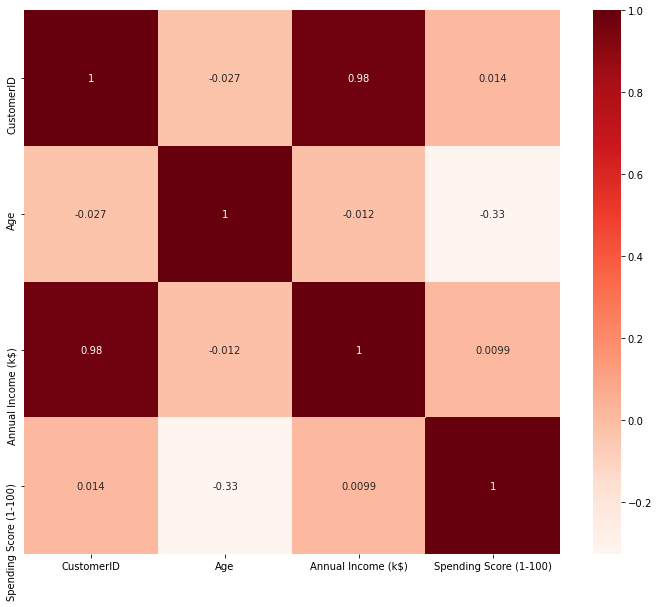

In [8]:
# Import necesary libraries
import seaborn as sns

# Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


So it seems that the customerId were provided based on the Annual Income, we are going to drop it.

In [17]:
X = data.drop(['Spending Score (1-100)', 'Income Category', 'CustomerID'], axis = 1)

# Change the values of Gender
X['new_gender'] = np.select([data['Gender'] == 'Female', data['Gender'] == 'Male'], [1, 0])
X = X.drop(['Gender'], axis = 1)

y = data['Spending Score (1-100)']


In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = list(range(2,10))

for clusters in n_clusters:
    km = KMeans(n_clusters=clusters).fit(X)

    predictions = km.predict(X)

    score = silhouette_score(X, predictions, metric = 'euclidean')

    print('For n_clusters {}. The average silhouette score is: {}'.format(clusters, score))

For n_clusters 2. The average silhouette score is: 0.4259331203289506
For n_clusters 3. The average silhouette score is: 0.4250534215103805
For n_clusters 4. The average silhouette score is: 0.4331549993604238
For n_clusters 5. The average silhouette score is: 0.4029594370436629
For n_clusters 6. The average silhouette score is: 0.392083469096375
For n_clusters 7. The average silhouette score is: 0.38522720615949635
For n_clusters 8. The average silhouette score is: 0.3921066424289332
For n_clusters 9. The average silhouette score is: 0.39331939973173796


We are going to choose the n_clusters = 2. It has the higher silhouete score.

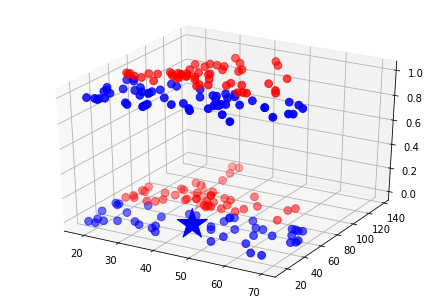

In [32]:
from mpl_toolkits.mplot3d import Axes3D

km = KMeans(n_clusters=2).fit(X)
predictions = km.predict(X)

centers = km.cluster_centers_

colores = ['red', 'blue']
asignar = []
for row in predictions:
    asignar.append(colores[row])

fig3 = plt.figure()
ax = Axes3D(fig3)

ax.scatter(X['Age'], X['Annual Income (k$)'], X['new_gender'], c = asignar, s=60)
ax.scatter(centers[:, 0], centers[:, 1], marker='*', c = ['red', 'blue'], s=1000)

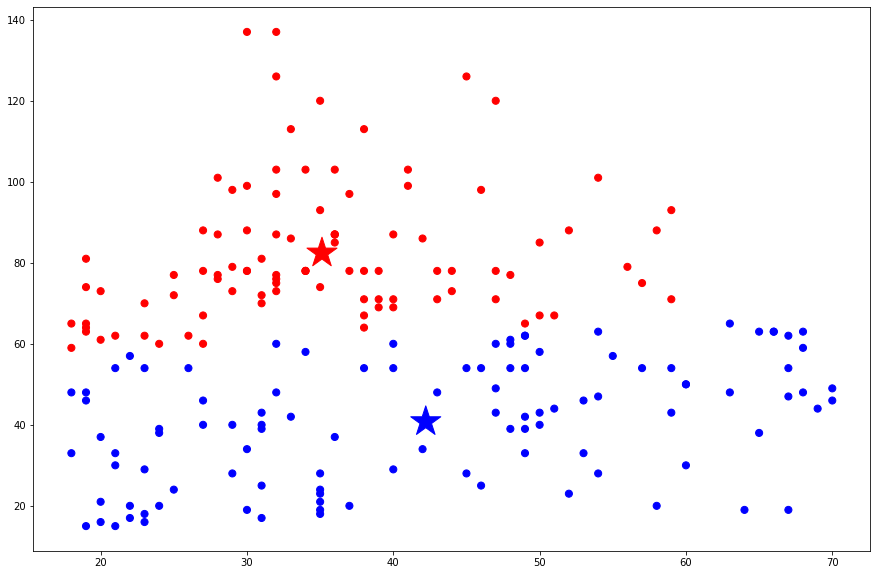

In [34]:
fig4, axs = plt.subplots(figsize = (15, 10))

axs.scatter(X['Age'], X['Annual Income (k$)'], c = asignar, s = 50)
axs.scatter(centers[:, 0], centers[:, 1], marker = '*', c = colores, s = 1000)